### Script contents:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning Continued
     Renaming Columns
     Missing values Check
#### 3. Exploring Relationships
     Correlation heatmap using seaborn
     Scatterplots
     Pair Plots
     Categorical Plots
#### 4. Hypotheses

### 1. Importing Visualization Libraries and Data

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Import Data
df = pd.read_csv(r'C:\Users\Jay\Documents\UFO Sightings Analysis\02 Data Sets\Prepared Data\ufo_sighting_data_cleaned.csv', index_col = False, low_memory=False)

In [3]:
# Verify matplotlib version
matplotlib.__version__

'3.4.3'

In [4]:
# Enable the charts created to be displayed without the need to "call" them.
%matplotlib inline

In [5]:
# Define path
path = r'C:\Users\Jay\Documents\UFO Sightings Analysis'

### 2. Data Cleaning Continued

In [6]:
df.shape

(80231, 12)

In [7]:
df.columns

Index(['Unnamed: 0', 'Date_time', 'city', 'state/province', 'country',
       'UFO_shape', 'length_of_encounter_seconds',
       'described_duration_of_encounter', 'description', 'date_documented',
       'latitude', 'longitude'],
      dtype='object')

In [8]:
df.dtypes

Unnamed: 0                           int64
Date_time                           object
city                                object
state/province                      object
country                             object
UFO_shape                           object
length_of_encounter_seconds        float64
described_duration_of_encounter     object
description                         object
date_documented                     object
latitude                           float64
longitude                          float64
dtype: object

#### Renaming Columns:

In [9]:
# Rename columns w/long names
df.rename(columns = {'length_of_encounter_seconds' : 'length_seconds', 'described_duration_of_encounter': 'duration_description'},
                      inplace = True)

#### Missing Values Check:

In [10]:
# Check for missing values
df.isnull().sum()

Unnamed: 0                 0
Date_time                  0
city                       0
state/province          5775
country                 2680
UFO_shape               1929
length_seconds             0
duration_description       0
description               15
date_documented            0
latitude                   0
longitude                  0
dtype: int64

###### Missing values concur with findings in previous script.

In [11]:
# Delete ambiguous number column
del df['Unnamed: 0']

In [12]:
df.head()

,Date_time,city,state/province,country,UFO_shape,length_seconds,duration_description,description,date_documented,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111
1,10/10/1949 21:00,lackland afb,tx,us,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.200000,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611


In [13]:
# overwrite existing dataframe w/out missing values
df.dropna(inplace = True)

In [14]:
df.shape

(72658, 11)

### 3. Exploring Relationships

#### Correlation heatmap using seaborn:

In [15]:
# Create subset including 'length_seconds', 'latitude' & 'longitude' columns
sub = df[['length_seconds','latitude','longitude']]

In [16]:
sub

,length_seconds,latitude,longitude
0,2700.0,29.883056,-97.941111
1,7200.0,29.384210,-98.581082
3,20.0,28.978333,-96.645833
4,900.0,21.418056,-157.803611
5,300.0,36.595000,-82.188889
...,...,...,...
80226,600.0,36.165833,-86.784444
80227,1200.0,43.613611,-116.202500
80228,1200.0,38.297222,-122.284444
80229,5.0,38.901111,-77.265556


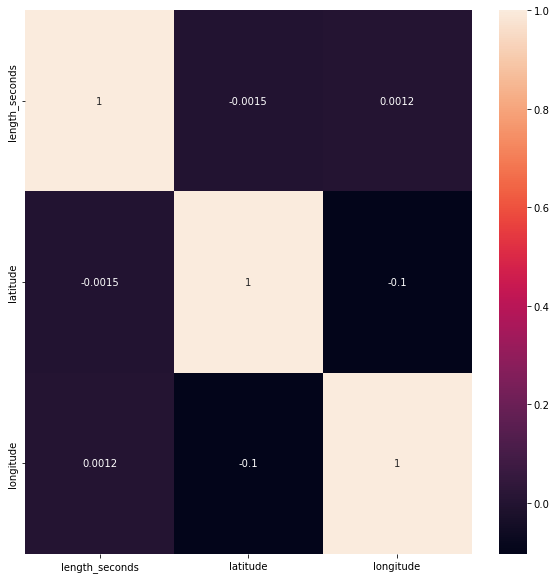

In [17]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 
# The 'annot' argument allows the plot to place the correlation coefficients onto the heatmap.

##### The diagonal 1's represent each variable's perfect positive relationship to itself; -0.0015 & .0012 show a very weak relationship between length_seconds, and latitude & longitude, respectively; while -0.1 shows a negative or non-relationship between longitude & latitude. 

#### Scatterplots:

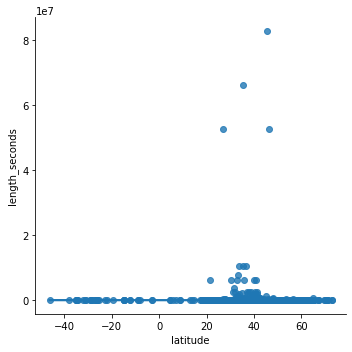

In [18]:
# Create scatterplot for 'length_seconds' and 'latitude' columns in seaborn
sns.lmplot(x = 'latitude', y = 'length_seconds', data = df)

##### The tick marks on the Y-axis must represent a 100M multiplier, as the relatively few visible data points are fairly extreme outliers, the highest in the data set being 97,836,000 seconds, which represents a described encounter of 31 years. Likely not a useful viz otherwise, but it does display the highest outliers, and it appears there may be some correlation with these and a certain area of latitude. We can picture a nearly vertical trend line among them. This may warrant futher investigation.

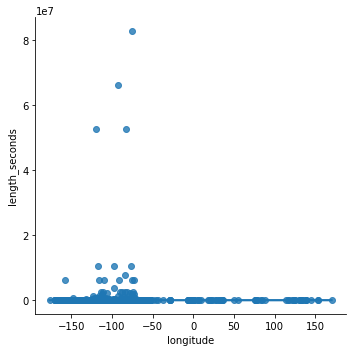

In [19]:
# Create scatterplot for 'length_seconds' and 'longitude' columns in seaborn
sns.lmplot(x = 'longitude', y = 'length_seconds', data = df)

##### Similar result using longitude, however there is a slightly wider spread among the lowest visible outliers.

#### Pair Plots:

In [20]:
# Removing unstructured variables, likely causing pair plot command to freeze.

sub_2 = df[['length_seconds', 'latitude', 'longitude']] 

In [21]:
# Create pair plot of above subset

#g = sns.pairplot(sub_2) 

##### Multiple attempts to create pair plot above, using entire data set & various subsets. The commmand would eventually freeze the kernel every time, no memory error, just stops responding.

#### Categorical Plots:

In [22]:
# Create sighting length categories

In [23]:
df.loc[df['length_seconds'] < 60, 'Length category'] = 'Brief sighting'

In [24]:
df.loc[(df['length_seconds'] >= 60) & (df['length_seconds'] <= 300), 'Length category'] = 'Short sighting'

In [25]:
df.loc[df['length_seconds'] > 300, 'Length category'] = 'Long sighting'

In [26]:
df['Length category'].value_counts(dropna = False)

Short sighting    27094
Long sighting     24425
Brief sighting    21139
Name: Length category, dtype: int64

In [27]:
df.columns

Index(['Date_time', 'city', 'state/province', 'country', 'UFO_shape',
       'length_seconds', 'duration_description', 'description',
       'date_documented', 'latitude', 'longitude', 'Length category'],
      dtype='object')

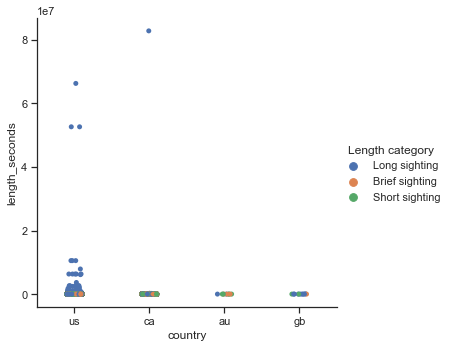

In [28]:
# Create categorical plot in seaborn using sighting length categories created above

sns.set(style="ticks")
g = sns.catplot(x="country", y="length_seconds", hue="Length category", data=df)

##### Similarity to the above scatterplots is seen, likely due to long sighting outliers. Additional wrangling of the data may enable a better view of the sighting length distributions. While most questions remain unanswerable at this point, it can be seen that approximately a dozen of the longest sightings occurred in the US, with the single longest sighting recorded in Canada.

In [29]:
# export current dataframe to Prepared Data
df.to_csv(os.path.join(path, '02 Data Sets', 'Prepared Data', 'ufo_sighting_data_explored.csv')) 

### 4. Hypotheses

##### * If specific geographic areas have many recorded sightings, then a majority of these will have common descriptive attributes, such as shape, motion, or sound.

##### * If a large concentration of sightings are reported in a remote area, then close proximity to a military test site may provide partial explanation, while remaining officially unsolved due to classified information.

To quote a news release from 6/22/98: "It may be valuable to carefully evaluate UFO reports to extract information about unusual phenomena currently unknown to science." To be credible to the scientific community "such evaluations must take place with a spirit of objectivity and a willingness to evaluate rival hypotheses" 

https://news.stanford.edu/pr/98/980629ufostudy.html